In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.tsa.vector_ar.vecm import coint_johansen



In [2]:
data = pd.read_excel("Daily_Currency_Prices.xlsx",index_col=0,skiprows=0)

In [3]:
data.tail(10)

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-17,0.007437,0.6700,0.6180,1.0926,1.2374,0.746714,1.112966,0.032749,0.145378,0.012198,...,0.127402,0.017883,0.749625,0.028994,0.000758,0.000068,0.226296,0.000043,0.051583,0.000247
2023-04-18,0.007458,0.6722,0.6207,1.0971,1.2424,0.746993,1.116071,0.032804,0.145444,0.012183,...,0.127390,0.017809,0.750469,0.029172,0.000758,0.000067,0.225632,0.000043,0.051584,0.000247
2023-04-19,0.007424,0.6713,0.6198,1.0954,1.2438,0.742942,1.114330,0.032704,0.145243,0.012156,...,0.127395,0.017730,0.749457,0.029036,0.000752,0.000067,0.225225,0.000043,0.051585,0.000246
2023-04-20,0.007450,0.6740,0.6170,1.0967,1.2443,0.742170,1.120951,0.032770,0.145507,0.012177,...,0.127395,0.017895,0.750751,0.029129,0.000756,0.000067,0.225479,0.000043,0.051544,0.000246
2023-04-21,0.007454,0.6690,0.6133,1.0987,1.2430,0.738607,1.120323,0.032653,0.145096,0.012191,...,0.127429,0.017895,0.749457,0.029112,0.000752,0.000067,0.225479,0.000043,0.051615,0.000246
2023-04-24,0.007450,0.6696,0.6166,1.1041,1.2482,0.738607,1.127015,0.032629,0.145016,0.012203,...,0.127403,0.017969,0.749963,0.029121,0.000750,0.000067,0.225479,0.000043,0.051517,0.000245
2023-04-25,0.007479,0.6625,0.6136,1.0972,1.2408,0.733945,1.121453,0.032565,0.144252,0.012200,...,0.127395,0.018012,0.747049,0.029070,0.000746,0.000067,0.225073,0.000043,0.051481,0.000245
2023-04-26,0.007482,0.6598,0.6116,1.1040,1.2467,0.733407,1.122209,0.032553,0.144381,0.012234,...,0.127398,0.017966,0.748839,0.029291,0.000747,0.000067,0.224467,0.000043,0.051554,0.000244
2023-04-27,0.007466,0.6629,0.6147,1.1027,1.2487,0.735781,1.118443,0.032575,0.144467,0.012241,...,0.127397,0.017950,0.749400,0.029291,0.000747,0.000068,0.224215,0.000043,0.051456,0.000244


In [4]:
data.describe()

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,...,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000
mean,0.009003,0.768279,0.707633,1.165312,1.383935,0.800719,1.049691,0.033110,0.152592,0.014721,...,0.128430,0.020549,0.743939,0.030528,0.000874,0.000075,0.254435,0.000044,0.260374,0.000248
std,0.000783,0.092921,0.069167,0.095239,0.143248,0.073630,0.041224,0.001436,0.007304,0.001447,...,0.000621,0.001683,0.029053,0.001711,0.000054,0.000009,0.030667,0.000002,0.148880,0.000002
min,0.006660,0.574100,0.556300,0.959200,1.068400,0.686059,0.970591,0.029660,0.136958,0.012046,...,0.127390,0.016926,0.685307,0.026123,0.000692,0.000060,0.210704,0.000040,0.051420,0.000242
25%,0.008687,0.709400,0.659900,1.101600,1.279300,0.753196,1.013582,0.032278,0.145618,0.013582,...,0.127818,0.019314,0.725426,0.029123,0.000843,0.000070,0.235967,0.000043,0.136109,0.000246
50%,0.009090,0.745100,0.694550,1.136100,1.337350,0.774773,1.041016,0.033072,0.152672,0.014744,...,0.128773,0.020093,0.737790,0.030604,0.000882,0.000072,0.241779,0.000044,0.257053,0.000247
75%,0.009455,0.782775,0.732275,1.210350,1.514150,0.805964,1.084217,0.033793,0.159684,0.015660,...,0.128969,0.021905,0.753963,0.031867,0.000907,0.000076,0.261397,0.000046,0.360338,0.000249
max,0.011538,1.059500,0.882000,1.393300,1.716300,1.017294,1.166589,0.036353,0.165557,0.018861,...,0.129046,0.024691,0.819605,0.034977,0.000991,0.000104,0.337610,0.000048,0.572967,0.000259


In [5]:
#Put the data into a dataframe  ###DATAFRAME USED TO ACCELERATE THE ANALITICS
df_data=pd.DataFrame(data)
df_data

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.011538,1.0395,0.8274,1.3204,1.6243,1.007252,1.092180,0.034429,0.160511,0.018288,...,0.129029,0.024390,0.818934,0.032701,0.000941,0.000104,0.327118,0.000048,0.561230,0.000250
2013-01-02,0.011450,1.0503,0.8340,1.3184,1.6255,1.015435,1.089799,0.034489,0.160511,0.018440,...,0.129024,0.024480,0.819605,0.032938,0.000940,0.000104,0.329598,0.000048,0.562841,0.000250
2013-01-03,0.011464,1.0464,0.8278,1.3046,1.6106,1.012453,1.079331,0.034513,0.160511,0.018352,...,0.129024,0.024570,0.815860,0.032960,0.000941,0.000104,0.330033,0.000048,0.560538,0.000250
2013-01-04,0.011348,1.0478,0.8313,1.3067,1.6071,1.013171,1.082017,0.034468,0.160506,0.018205,...,0.129034,0.024498,0.815195,0.032830,0.000941,0.000104,0.328181,0.000048,0.561861,0.000250
2013-01-07,0.011393,1.0502,0.8369,1.3115,1.6112,1.014713,1.085776,0.034483,0.160529,0.018113,...,0.129021,0.024456,0.813802,0.032852,0.000941,0.000104,0.328785,0.000048,0.562493,0.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,0.007450,0.6696,0.6166,1.1041,1.2482,0.738607,1.127015,0.032629,0.145016,0.012203,...,0.127403,0.017969,0.749963,0.029121,0.000750,0.000067,0.225479,0.000043,0.051517,0.000245
2023-04-25,0.007479,0.6625,0.6136,1.0972,1.2408,0.733945,1.121453,0.032565,0.144252,0.012200,...,0.127395,0.018012,0.747049,0.029070,0.000746,0.000067,0.225073,0.000043,0.051481,0.000245
2023-04-26,0.007482,0.6598,0.6116,1.1040,1.2467,0.733407,1.122209,0.032553,0.144381,0.012234,...,0.127398,0.017966,0.748839,0.029291,0.000747,0.000067,0.224467,0.000043,0.051554,0.000244


In [6]:
# Plot and save individual time series
for col in df_data.iteritems():
    print('plotting '+col[0])
    
    # create a new figure and axis
    fig, ax = plt.subplots()
    
    # extract the column data and plot it
    indicator = df_data[col[0]]
    ax.plot(indicator, alpha=0.9, color='#009ACD')
    
    # add x and y axis labels and a title
    ax.set_xlabel('Date')
    ax.set_ylabel(col[0])
    ax.set_title('Historic Prices: ' + col[0])
    
    # save the plot to a file and close the figure
    plt.savefig('Historic_price_'+col[0]+'.png')
    plt.close()

plotting JPY=
plotting AUD=
plotting NZD=
plotting EUR=
plotting GBP=
plotting CAD=
plotting CHF=
plotting TWD=
plotting CNY=
plotting INR=
plotting RUB=
plotting HKD=
plotting PHP=
plotting SGD=
plotting THB=
plotting KRW=
plotting IDR=
plotting MYR=
plotting VND=
plotting TRY=
plotting KHR=


In [8]:
## Data on the 16th and 17th April 2014 was considered an outlier and an adjustment was made. Instead of making values=0,
#the average between the two values surrounding these days (15-04-2014 and 18-04-2014) was put instead of the original values

print('Before Adjustment',df_data['KHR='][336:338])
data['KHR='][336:338] = 0.000253
print('-------------')
print('After Adjustment',df_data['KHR='][336:338])


Before Adjustment Date
2014-04-16    0.000259
2014-04-17    0.000258
Name: KHR=, dtype: float64
-------------
After Adjustment Date
2014-04-16    0.000253
2014-04-17    0.000253
Name: KHR=, dtype: float64


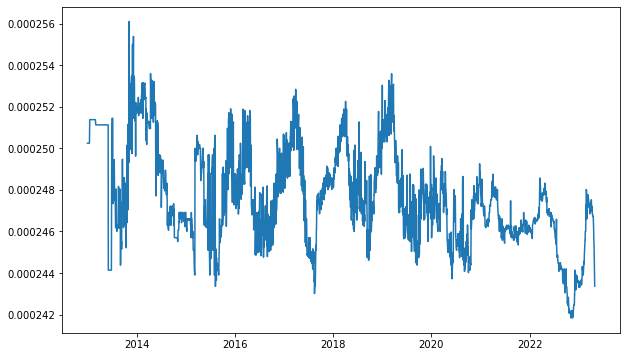

In [10]:
# plot one series
plt.figure(figsize=(10, 6))
plt.plot(df_data['KHR='])
plt.show()


In [11]:
################################################ RETURN CALCULATION ########################################################

returns = {}
for col in df_data.columns:
    returns[col] = df_data[col].pct_change().dropna()

In [12]:
################################################### CALCULATIONS OF RETURNS ###############################################
###### LONG CODE#### SIMPLIFIED IS ABOVE
#JPY_returns = data['JPY'].pct_change().dropna()
#AUD_returns = data['AUD'].pct_change().dropna()
#NZD_returns = data['NZD'].pct_change().dropna()
#EUR_returns = data['EUR'].pct_change().dropna()
#GBP_returns = data['GBP'].pct_change().dropna()
#CAD_returns = data['CAD'].pct_change().dropna()
#CHF_returns = data['CHF'].pct_change().dropna()
#TWD_returns = data['TWD'].pct_change().dropna()
#CNY_returns = data['CNY'].pct_change().dropna()
#INR_returns = data['INR'].pct_change().dropna()
#RUB_returns = data['RUB'].pct_change().dropna()
#HKD_returns = data['HKD'].pct_change().dropna()
#PHP_returns = data['PHP'].pct_change().dropna()
#SGD_returns = data['SGD'].pct_change().dropna()
#THB_returns = data['THB'].pct_change().dropna()
#KRW_returns = data['KRW'].pct_change().dropna()
#IDR_returns = data['IDR'].pct_change().dropna()
#MYR_returns = data['MYR'].pct_change().dropna()
#VND_returns = data['VND'].pct_change().dropna()
#TRY_returns = data['TRY'].pct_change().dropna()
#KHR_returns = data['KHR'].pct_change().dropna()


In [13]:
################################################# QQ PLOTS (FOR RETURNS) ################################################################
for col, ret in returns.items():
    sm.qqplot(ret, line='s')
    plt.title(col + ' QQ Plot')
    plt.savefig(col + '_returns_qqplot.png')
    plt.close()
    plt.show()

In [14]:
################################################ HISTOGRAM (FOR RETURNS) #####################################################

for col, ret in returns.items():
    plt.hist(ret, bins=30,color="#6C9AEC")
    plt.title(col + ' Returns Histogram')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.savefig(col + '_returns_hist.png')
    plt.close()
    #plt.show()

In [15]:
############################################ BOXPLOTS (RETURNS) ###########################################################

#Create data frame returns
df_returns=pd.DataFrame(returns)

# Make boxplot for each column of the data frame
for col in df_returns.columns:
    sns.boxplot(data=df_returns[col], color='#6C9AEC')
    plt.title(col)
    plt.savefig(col + '_boxplot.png')
    plt.close()
    #plt.show()

In [16]:
# Shapiro Wilk Test for each currency return
for col, ret in returns.items():
    stat, p = shapiro(ret)
    print('Shapiro-Wilk normality test for ' + col + ' returns:')
    print('Statistics=%.3f, p-value=%.7f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk normality test for JPY= returns:
Statistics=0.937, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for AUD= returns:
Statistics=0.984, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for NZD= returns:
Statistics=0.991, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for EUR= returns:
Statistics=0.981, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for GBP= returns:
Statistics=0.931, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for CAD= returns:
Statistics=0.989, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for CHF= returns:
Statistics=0.705, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for TWD= returns:
Statistics=0.961, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-

In [17]:
#   From the shapiro test we can conclude that the returns are not normally distributed

In [18]:
################################################ HISTOGRAM (FOR PRICES) #############################################################

# first create a dataframe and then generate the qq plots that will be saved on the respective folder

df=pd.DataFrame(data)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram for '+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='#FD7257',bins=20)
    plt.title(col[0])
    plt.savefig('Normality_chart'+col[0]+'.png')
    #plt.show()
    plt.close()

histogram for JPY=
histogram for AUD=
histogram for NZD=
histogram for EUR=
histogram for GBP=
histogram for CAD=
histogram for CHF=
histogram for TWD=
histogram for CNY=
histogram for INR=
histogram for RUB=
histogram for HKD=
histogram for PHP=
histogram for SGD=
histogram for THB=
histogram for KRW=
histogram for IDR=
histogram for MYR=
histogram for VND=
histogram for TRY=
histogram for KHR=


In [19]:
################################################### QQ PLOT(FOR PRICES) ###################################################

df = pd.DataFrame(data)
df.dropna(axis='rows', inplace=True)

for col in df.columns:
    print('QQ plot for ' + col)
    fig, ax = plt.subplots()
    sm.qqplot(df[col], line='s', ax=ax)
    ax.set_title(col + ' QQ Plot')
    plt.savefig(col + 'prices_qqplot.png')
    plt.close()

QQ plot for JPY=
QQ plot for AUD=
QQ plot for NZD=
QQ plot for EUR=
QQ plot for GBP=
QQ plot for CAD=
QQ plot for CHF=
QQ plot for TWD=
QQ plot for CNY=
QQ plot for INR=
QQ plot for RUB=
QQ plot for HKD=
QQ plot for PHP=
QQ plot for SGD=
QQ plot for THB=
QQ plot for KRW=
QQ plot for IDR=
QQ plot for MYR=
QQ plot for VND=
QQ plot for TRY=
QQ plot for KHR=


In [20]:
# Make boxplot for each column of the data frame

for col in df_data.columns:
    sns.boxplot(data=df_data[col], color='#FD7257')
    plt.title(col)
    plt.savefig(col + '_boxplot.png')
    #plt.show()
    plt.close()

In [21]:
# Shapiro Wilk Test for each currency return
for col, ret in df_data.items():
    stat, p = shapiro(ret)
    print('Shapiro-Wilk normality test for ' + col + ' prices:')
    print('Statistics=%.3f, p-value=%.7f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk normality test for JPY= prices:
Statistics=0.970, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for AUD= prices:
Statistics=0.869, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for NZD= prices:
Statistics=0.940, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for EUR= prices:
Statistics=0.925, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for GBP= prices:
Statistics=0.936, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for CAD= prices:
Statistics=0.808, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for CHF= prices:
Statistics=0.960, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk normality test for TWD= prices:
Statistics=0.971, p-value=0.0000000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk nor

In [22]:
############################################# STATIONARITY TEST ###########################################################

In [23]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Testing stationarity in level
for column in df_data.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        adf_level = adfuller(df_data[column], maxlag=lag, regression='n', autolag=None)
        adf_level_statistic = adf_level[0]
        adf_level_pvalue = adf_level[1]
        print("ADF Test Statistic (Level):", adf_level_statistic)
        print("p-value (Level):", adf_level_pvalue)
        print()

# Testing stationarity in first difference
for column in df_data.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        df_diff = df_data[column].diff().dropna()  # Compute the first difference
        adf_diff = adfuller(df_diff, maxlag=lag, regression='n', autolag=None)
        adf_diff_statistic = adf_diff[0]
        adf_diff_pvalue = adf_diff[1]
        print("ADF Test Statistic (First Difference):", adf_diff_statistic)
        print("p-value (First Difference):", adf_diff_pvalue)
        print()



Column: JPY=
Number of lags used: 1
ADF Test Statistic (Level): -1.7577678995526842
p-value (Level): 0.07479789922304135

Number of lags used: 2
ADF Test Statistic (Level): -1.7514745971775059
p-value (Level): 0.07580204621097408

Column: AUD=
Number of lags used: 1
ADF Test Statistic (Level): -1.9205170548688035
p-value (Level): 0.0522991674949703

Number of lags used: 2
ADF Test Statistic (Level): -1.9071954053914606
p-value (Level): 0.05390382501910354

Column: NZD=
Number of lags used: 1
ADF Test Statistic (Level): -1.115780787638335
p-value (Level): 0.2400141586150915

Number of lags used: 2
ADF Test Statistic (Level): -1.0953134135725069
p-value (Level): 0.24749520272129533

Column: EUR=
Number of lags used: 1
ADF Test Statistic (Level): -0.9015019267714878
p-value (Level): 0.3282229587167702

Number of lags used: 2
ADF Test Statistic (Level): -0.845657148353843
p-value (Level): 0.35140841335259254

Column: GBP=
Number of lags used: 1
ADF Test Statistic (Level): -1.06094645115437

In [24]:
###### AQM METHOD ######
import numpy as np
from statsmodels.tsa.stattools import adfuller

var_list = df_data.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])
    print('____________________________________________', '\n')


Number of lags used: 1
ADF P-Val for Prices (Level)
JPY= : 0.074797899223
AUD= : 0.052299167495
NZD= : 0.240014158615
EUR= : 0.328222958717
GBP= : 0.260351612841
CAD= : 0.078879026986
CHF= : 0.661745831970
TWD= : 0.500118516197
CNY= : 0.318132937306
INR= : 0.031193820444
RUB= : 0.015367853416
HKD= : 0.417583545672
PHP= : 0.033240471079
SGD= : 0.401846696904
THB= : 0.394341755123
KRW= : 0.301361158306
IDR= : 0.014198433684
MYR= : 0.030077272835
VND= : 0.046947708510
TRY= : 0.000012075465
KHR= : 0.586045887291
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
JPY= : 0.075802046211
AUD= : 0.053903825019
NZD= : 0.247495202721
EUR= : 0.351408413353
GBP= : 0.281030014149
CAD= : 0.078562259967
CHF= : 0.677866117674
TWD= : 0.492907205287
CNY= : 0.316907080931
INR= : 0.019509600772
RUB= : 0.015943636023
HKD= : 0.417733496908
PHP= : 0.028516702074
SGD= : 0.409893124960
THB= : 0.394125626374
KRW= : 0.301526136144
IDR= : 0.020477738152
MYR= : 0.0346

In [27]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import sqlite3

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database2.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Drop the existing table if it exists
cursor.execute("DROP TABLE IF EXISTS adf_results")

# Create a new table to store the results
cursor.execute('''CREATE TABLE adf_results (
                    Currency_Asset TEXT,
                    lags INTEGER,
                    p_value REAL
                )''')

var_list = df_data.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])

        # Insert the result into the database
        sql = "INSERT INTO adf_results (Currency_Asset, lags, p_value) VALUES (?, ?, ?)"
        values = (i, lags, adf_library[1])
        cursor.execute(sql, values)

    print('____________________________________________', '\n')

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()



Number of lags used: 1
ADF P-Val for Prices (Level)
JPY= : 0.074797899223
AUD= : 0.052299167495
NZD= : 0.240014158615
EUR= : 0.328222958717
GBP= : 0.260351612841
CAD= : 0.078879026986
CHF= : 0.661745831970
TWD= : 0.500118516197
CNY= : 0.318132937306
INR= : 0.031193820444
RUB= : 0.015367853416
HKD= : 0.417583545672
PHP= : 0.033240471079
SGD= : 0.401846696904
THB= : 0.394341755123
KRW= : 0.301361158306
IDR= : 0.014198433684
MYR= : 0.030077272835
VND= : 0.046947708510
TRY= : 0.000012075465
KHR= : 0.586045887291
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
JPY= : 0.075802046211
AUD= : 0.053903825019
NZD= : 0.247495202721
EUR= : 0.351408413353
GBP= : 0.281030014149
CAD= : 0.078562259967
CHF= : 0.677866117674
TWD= : 0.492907205287
CNY= : 0.316907080931
INR= : 0.019509600772
RUB= : 0.015943636023
HKD= : 0.417733496908
PHP= : 0.028516702074
SGD= : 0.409893124960
THB= : 0.394125626374
KRW= : 0.301526136144
IDR= : 0.020477738152
MYR= : 0.0346

In [28]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n',autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n',autolag=None)

        print(i,':',"%.12f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
JPY= : 0.000000000000
AUD= : 0.000000000000
NZD= : 0.000000000000
EUR= : 0.000000000000
GBP= : 0.000000000000
CAD= : 0.000000000000
CHF= : 0.000000000000
TWD= : 0.000000000000
CNY= : 0.000000000000
INR= : 0.000000000000
RUB= : 0.000000000000
HKD= : 0.000000000000
PHP= : 0.000000000000
SGD= : 0.000000000000
THB= : 0.000000000000
KRW= : 0.000000000000
IDR= : 0.000000000000
MYR= : 0.000000000000
VND= : 0.000000000000
TRY= : 0.000000000000
KHR= : 0.000000000000
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
JPY= : 0.000000000000
AUD= : 0.000000000000
NZD= : 0.000000000000
EUR= : 0.000000000000
GBP= : 0.000000000000
CAD= : 0.000000000000
CHF= : 0.000000000000
TWD= : 0.000000000000
CNY= : 0.000000000000
INR= : 0.000000000000
RUB= : 0.000000000000
HKD= : 0.000000000000
PHP= : 0.000000000000
SGD= : 0.000000000000
THB= : 0.000000000000
KRW= : 0.0000000000

The results indicate some currencies are stationary and some are not

In [30]:
################################################## DATA TRANSFORMATION ###################################################
#### List of non-stationary currencies
non_stationary_currencies = ['NZD=', 'EUR=', 'GBP=', 'CHF=', 'TWD=', 'CNY=', 'HKD=', 'SGD=', 'THB=', 'KRW=', 'KHR=']

# Create a copy of df_data
df_data_copy = df_data.copy()

# Iterate over the non-stationary currencies
for currency in non_stationary_currencies:
    # Perform the first difference on the copy
    df_data_copy[f"{currency}_diff"] = df_data_copy[currency].diff()
    
# Drop the rows with NaN values resulting from differencing in the copy
df_data_copy.dropna(inplace=True)


In [31]:
# List of columns to drop
columns_to_drop = ['NZD=', 'EUR=', 'GBP=', 'CHF=', 'TWD=', 'CNY=', 'HKD=', 'SGD=', 'THB=', 'KRW=', 'KHR=']

# Create a new DataFrame with the dropped columns
df_transformed = df_data_copy.drop(columns=columns_to_drop)

print(df_transformed)  # Print the new DataFrame

# Export the new DataFrame to Excel
df_transformed.to_excel('df_transformed.xlsx', index=False)


                JPY=    AUD=      CAD=      INR=      RUB=      PHP=  \
Date                                                                   
2013-01-02  0.011450  1.0503  1.015435  0.018440  0.033157  0.024480   
2013-01-03  0.011464  1.0464  1.012453  0.018352  0.033074  0.024570   
2013-01-04  0.011348  1.0478  1.013171  0.018205  0.032979  0.024498   
2013-01-07  0.011393  1.0502  1.014713  0.018113  0.032966  0.024456   
2013-01-08  0.011490  1.0501  1.013788  0.018198  0.033006  0.024516   
...              ...     ...       ...       ...       ...       ...   
2023-04-24  0.007450  0.6696  0.738607  0.012203  0.012423  0.017969   
2023-04-25  0.007479  0.6625  0.733945  0.012200  0.012392  0.018012   
2023-04-26  0.007482  0.6598  0.733407  0.012234  0.012177  0.017966   
2023-04-27  0.007466  0.6629  0.735781  0.012241  0.012256  0.017950   
2023-04-28  0.007338  0.6607  0.738007  0.012237  0.012587  0.018028   

                IDR=      MYR=      VND=      TRY=  ...  EUR=_d

In [32]:
df_transformed

,JPY=,AUD=,CAD=,INR=,RUB=,PHP=,IDR=,MYR=,VND=,TRY=,...,EUR=_diff,GBP=_diff,CHF=_diff,TWD=_diff,CNY=_diff,HKD=_diff,SGD=_diff,THB=_diff,KRW=_diff,KHR=_diff
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.011450,1.0503,1.015435,0.018440,0.033157,0.024480,0.000104,0.329598,0.000048,0.562841,...,-0.0020,0.0012,-0.002381,0.000059,0.000000,-0.000005,0.000671,0.000237,-5.307184e-08,0.000000e+00
2013-01-03,0.011464,1.0464,1.012453,0.018352,0.033074,0.024570,0.000104,0.330033,0.000048,0.560538,...,-0.0138,-0.0149,-0.010469,0.000024,0.000000,0.000000,-0.003745,0.000022,3.096702e-07,0.000000e+00
2013-01-04,0.011348,1.0478,1.013171,0.018205,0.032979,0.024498,0.000104,0.328181,0.000048,0.561861,...,0.0021,-0.0035,0.002686,-0.000044,-0.000005,0.000010,-0.000665,-0.000130,7.174480e-07,0.000000e+00
2013-01-07,0.011393,1.0502,1.014713,0.018113,0.032966,0.024456,0.000104,0.328785,0.000048,0.562493,...,0.0048,0.0041,0.003759,0.000014,0.000023,-0.000013,-0.001393,0.000022,-7.262985e-07,0.000000e+00
2013-01-08,0.011490,1.0501,1.013788,0.018198,0.033006,0.024516,0.000104,0.328666,0.000048,0.562968,...,-0.0035,-0.0058,-0.003525,-0.000065,0.000142,-0.000010,-0.000132,0.000043,-8.753809e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,0.007450,0.6696,0.738607,0.012203,0.012423,0.017969,0.000067,0.225479,0.000043,0.051517,...,0.0054,0.0052,0.006692,-0.000025,-0.000080,-0.000026,0.000506,0.000008,-1.778269e-06,-7.226483e-07
2023-04-25,0.007479,0.6625,0.733945,0.012200,0.012392,0.018012,0.000067,0.225073,0.000043,0.051481,...,-0.0069,-0.0074,-0.005561,-0.000064,-0.000764,-0.000008,-0.002913,-0.000051,-4.690082e-06,-4.794091e-07
2023-04-26,0.007482,0.6598,0.733407,0.012234,0.012177,0.017966,0.000067,0.224467,0.000043,0.051554,...,0.0068,0.0059,0.000755,-0.000012,0.000129,0.000003,0.001790,0.000221,1.605240e-06,-4.179468e-07


In [33]:
#################### STATIONARITY TEST TO TRANSFORMED DATA ###############################################3
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Testing stationarity in level
for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        adf_level = adfuller(df_transformed[column], maxlag=lag, regression='n', autolag=None)
        adf_level_statistic = adf_level[0]
        adf_level_pvalue = adf_level[1]
        print("ADF Test Statistic (Level):", adf_level_statistic)
        print("p-value (Level):", adf_level_pvalue)
        print()

# Testing stationarity in first difference
for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        df_diff = df_transformed[column].diff().dropna()  # Compute the first difference
        adf_diff = adfuller(df_diff, maxlag=lag, regression='n', autolag=None)
        adf_diff_statistic = adf_diff[0]
        adf_diff_pvalue = adf_diff[1]
        print("ADF Test Statistic (First Difference):", adf_diff_statistic)
        print("p-value (First Difference):", adf_diff_pvalue)
        print()


Column: JPY=
Number of lags used: 1
ADF Test Statistic (Level): -1.7640458162003594
p-value (Level): 0.07380670950104778

Number of lags used: 2
ADF Test Statistic (Level): -1.7005370634455237
p-value (Level): 0.08432540154303775

Column: AUD=
Number of lags used: 1
ADF Test Statistic (Level): -1.9002158974127141
p-value (Level): 0.054760478474534885

Number of lags used: 2
ADF Test Statistic (Level): -1.9151763314309134
p-value (Level): 0.052937718800694374

Column: CAD=
Number of lags used: 1
ADF Test Statistic (Level): -1.7134134964319205
p-value (Level): 0.08210332393285075

Number of lags used: 2
ADF Test Statistic (Level): -1.7400321487614383
p-value (Level): 0.07765499752346543

Column: INR=
Number of lags used: 1
ADF Test Statistic (Level): -2.1003695009257
p-value (Level): 0.03422145633007573

Number of lags used: 2
ADF Test Statistic (Level): -2.27040673769679
p-value (Level): 0.022300358484357807

Column: RUB=
Number of lags used: 1
ADF Test Statistic (Level): -2.39666884555

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import sqlite3

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database2.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Create a table to store the results
cursor.execute('''CREATE TABLE IF NOT EXISTS adf_results_transformed (
                    Column TEXT,
                    Number_of_lags INTEGER,
                    Test_Statistic REAL,
                    p_value REAL,
                    Test_Type TEXT
                )''')

# Testing stationarity in level
results_df = pd.DataFrame(columns=["Column", "Number_of_lags", "Test_Statistic", "p_value", "Test_Type"])

for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        adf_level = adfuller(df_transformed[column], maxlag=lag, regression='n', autolag=None)
        adf_level_statistic = adf_level[0]
        adf_level_pvalue = adf_level[1]
        print("ADF Test Statistic (Level):", adf_level_statistic)
        print("p-value (Level):", adf_level_pvalue)
        print()

        # Append the result to the DataFrame
        results_df = results_df.append({
            "Column": column,
            "Number_of_lags": lag,
            "Test_Statistic": adf_level_statistic,
            "p_value": adf_level_pvalue,
            "Test_Type": "Level"
        }, ignore_index=True)

# Testing stationarity in first difference
for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        df_diff = df_transformed[column].diff().dropna()  # Compute the first difference
        adf_diff = adfuller(df_diff, maxlag=lag, regression='n', autolag=None)
        adf_diff_statistic = adf_diff[0]
        adf_diff_pvalue = adf_diff[1]
        print("ADF Test Statistic (First Difference):", adf_diff_statistic)
        print("p-value (First Difference):", adf_diff_pvalue)
        print()

        # Append the result to the DataFrame
        results_df = results_df.append({
            "Column": column,
            "Number_of_lags": lag,
            "Test_Statistic": adf_diff_statistic,
            "p_value": adf_diff_pvalue,
            "Test_Type": "First Difference"
        }, ignore_index=True)

# Export the results to the database
results_df.to_sql("adf_results_transformed", connection, if_exists="append", index=False)

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()



Column: JPY=
Number of lags used: 1
ADF Test Statistic (Level): -1.7640458162003594
p-value (Level): 0.07380670950104778

Number of lags used: 2
ADF Test Statistic (Level): -1.7005370634455237
p-value (Level): 0.08432540154303775

Column: AUD=
Number of lags used: 1
ADF Test Statistic (Level): -1.9002158974127141
p-value (Level): 0.054760478474534885

Number of lags used: 2
ADF Test Statistic (Level): -1.9151763314309134
p-value (Level): 0.052937718800694374

Column: CAD=
Number of lags used: 1
ADF Test Statistic (Level): -1.7134134964319205
p-value (Level): 0.08210332393285075

Number of lags used: 2
ADF Test Statistic (Level): -1.7400321487614383
p-value (Level): 0.07765499752346543

Column: INR=
Number of lags used: 1
ADF Test Statistic (Level): -2.1003695009257
p-value (Level): 0.03422145633007573

Number of lags used: 2
ADF Test Statistic (Level): -2.27040673769679
p-value (Level): 0.022300358484357807

Column: RUB=
Number of lags used: 1
ADF Test Statistic (Level): -2.39666884555

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\349160

ADF Test Statistic (Level): -2.29458795326299
p-value (Level): 0.020938259907401436

Column: MYR=
Number of lags used: 1
ADF Test Statistic (Level): -2.1597627922291482
p-value (Level): 0.029554996653316457

Number of lags used: 2
ADF Test Statistic (Level): -2.0431008743237955
p-value (Level): 0.03929695277939607

Column: VND=
Number of lags used: 1
ADF Test Statistic (Level): -1.96787667978203
p-value (Level): 0.046908701999540926

Number of lags used: 2
ADF Test Statistic (Level): -1.9350242022939255
p-value (Level): 0.050596469665858915

Column: TRY=
Number of lags used: 1
ADF Test Statistic (Level): -4.407077121645919
p-value (Level): 1.3976514066537854e-05

Number of lags used: 2
ADF Test Statistic (Level): -4.498843091009751
p-value (Level): 9.490073392487465e-06

Column: NZD=_diff
Number of lags used: 1
ADF Test Statistic (Level): -37.68453307392698
p-value (Level): 0.0

Number of lags used: 2
ADF Test Statistic (Level): -30.179997213189466
p-value (Level): 0.0

Column: EUR=_di

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\349160

ADF Test Statistic (Level): -32.118220460132704
p-value (Level): 0.0

Column: CNY=_diff
Number of lags used: 1
ADF Test Statistic (Level): -36.756411650024404
p-value (Level): 0.0

Number of lags used: 2
ADF Test Statistic (Level): -28.924597056488253
p-value (Level): 0.0

Column: HKD=_diff
Number of lags used: 1
ADF Test Statistic (Level): -36.85127503327605
p-value (Level): 0.0

Number of lags used: 2
ADF Test Statistic (Level): -31.34368431667034
p-value (Level): 0.0

Column: SGD=_diff
Number of lags used: 1
ADF Test Statistic (Level): -38.01951382778714
p-value (Level): 0.0

Number of lags used: 2
ADF Test Statistic (Level): -30.38130250415331
p-value (Level): 0.0

Column: THB=_diff
Number of lags used: 1
ADF Test Statistic (Level): -35.313890024434826
p-value (Level): 0.0

Number of lags used: 2
ADF Test Statistic (Level): -27.898325095427086
p-value (Level): 0.0

Column: KRW=_diff
Number of lags used: 1
ADF Test Statistic (Level): -37.37267093326957
p-value (Level): 0.0

Number o

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\349160

 2
ADF Test Statistic (First Difference): -30.07945515774499
p-value (First Difference): 0.0

Column: CAD=
Number of lags used: 1
ADF Test Statistic (First Difference): -37.53468845867747
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -29.95653863310619
p-value (First Difference): 0.0

Column: INR=
Number of lags used: 1
ADF Test Statistic (First Difference): -40.62941069655836
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -33.092582235096096
p-value (First Difference): 0.0

Column: RUB=
Number of lags used: 1
ADF Test Statistic (First Difference): -36.11433941894832
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -29.582190961866534
p-value (First Difference): 0.0

Column: PHP=
Number of lags used: 1
ADF Test Statistic (First Difference): -37.51489418838375
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Diffe

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\349160

ADF Test Statistic (First Difference): -36.658362334450395
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -30.910878732788763
p-value (First Difference): 0.0

Column: NZD=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -65.08003695913776
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -53.190550553188814
p-value (First Difference): 0.0

Column: EUR=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -63.19192392498065
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -51.78687414954652
p-value (First Difference): 0.0

Column: GBP=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -62.43394018268605
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -51.13640407676566
p-value (First Difference): 0.0

Column: CHF=_diff
Number of lags used: 1
ADF Test Stat

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\349160

 2
ADF Test Statistic (First Difference): -52.003775482100956
p-value (First Difference): 0.0

Column: SGD=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -64.97865855462393
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -53.086397189042465
p-value (First Difference): 0.0

Column: THB=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -63.70334346910732
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -52.147448275141485
p-value (First Difference): 0.0

Column: KRW=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -64.24801666984983
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test Statistic (First Difference): -51.51734706431736
p-value (First Difference): 0.0

Column: KHR=_diff
Number of lags used: 1
ADF Test Statistic (First Difference): -71.76342740853497
p-value (First Difference): 0.0

Number of lags used: 2
ADF Test S

C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\hites\AppData\Local\Temp\ipykernel_37728\3491608642.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


OperationalError: database is locked

In [36]:
###### AQM METHOD ######
import numpy as np
from statsmodels.tsa.stattools import adfuller

var_list = df_transformed.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_transformed[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_transformed[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])
    print('____________________________________________', '\n')

Number of lags used: 1
ADF P-Val for Prices (Level)
JPY= : 0.073806709501
AUD= : 0.054760478475
CAD= : 0.082103323933
INR= : 0.034221456330
RUB= : 0.015954889441
PHP= : 0.030470792595
IDR= : 0.014099875134
MYR= : 0.029554996653
VND= : 0.046908702000
TRY= : 0.000013976514
NZD=_diff : 0.000000000000
EUR=_diff : 0.000000000000
GBP=_diff : 0.000000000000
CHF=_diff : 0.000000000000
TWD=_diff : 0.000000000000
CNY=_diff : 0.000000000000
HKD=_diff : 0.000000000000
SGD=_diff : 0.000000000000
THB=_diff : 0.000000000000
KRW=_diff : 0.000000000000
KHR=_diff : 0.000000000000
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
JPY= : 0.084325401543
AUD= : 0.052937718801
CAD= : 0.077654997523
INR= : 0.022300358484
RUB= : 0.016537457362
PHP= : 0.030441866202
IDR= : 0.020938259907
MYR= : 0.039296952779
VND= : 0.050596469666
TRY= : 0.000009490073
NZD=_diff : 0.000000000000
EUR=_diff : 0.000000000000
GBP=_diff : 0.000000000000
CHF=_diff : 0.000000000000
TWD=

In [37]:
# After running the first difference we can conclude that  the variables are integrated in order (1)

In [38]:
##################################### COINTEGRATION TEST FOR TRANSFORMED ######################################

In [39]:
####### AQM COINTEGRATION ON TRANSFORMED ############
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

x_list = var_list
y_list = var_list
max_lags = 2
counter_total = 1
counter_lib_ECMLib = 1
counter_lib_ECMLib_n_Coded = 1

print('Number of identified cointegrations using the ECM Library by asset:')

for y_name in y_list:
    y = df_transformed[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset = 0
    lags_success = []
    R2_success = []

    for lags in range(0, max_lags, 1):
        for i in x_list:
            if not y_name == i:
                counter_total = counter_total + 1
                counter_total_byasset = counter_total_byasset + 1

                x_n = df_transformed[i]

                if y.shape > x_n.shape:
                    temp = y.drop(y.index[0])
                    y = temp
                elif y.shape < x_n.shape:
                    temp = x_n.drop(x_n.index[0])
                    d_i = temp
                if x_n.shape != y.shape:
                    print('Warning Data Problem: Y', y.shape, 'X:', x_n.shape)

                # Step 1: Stationarity Tests for the Residual between Y and other variables
                step1_myols = sm.OLS(y, x_n)
                step1_est_resid = step1_myols.fit().resid

                adf_library = sm.tsa.stattools.adfuller(step1_est_resid, maxlag=lags, regression='n', autolag=None)

                ECM_results_lib = sm.tsa.stattools.coint(y, df_transformed[i], trend='c', maxlag=lags)

                if ECM_results_lib[1] < 0.1:
                    counter_lib_ECMLib = counter_lib_ECMLib + 1

                    OLS_results_lib = sm.OLS(y, x_n, hasconst=None).fit()
                    OLS_results_code = sm.OLS(y, x_n)

                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_lib.rsquared)

    print(y_name, ':', counter_lib_ECMLib_success_temp, 'out of total', counter_total_byasset, 'cointegration identified at ADF lags:', lags_success)

print('\n', 'total number of regressions conducted:', counter_total - 1)
print('total number of identified cointegrations using only ECM Library:', counter_lib_ECMLib - 1)
print('total number of identified cointegrations using both ECM Library and own code:', counter_lib_ECMLib_n_Coded - 1)



Number of identified cointegrations using the ECM Library by asset:
JPY= : 0 out of total 40 cointegration identified at ADF lags: []
AUD= : 10 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
CAD= : 9 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 1, 1, 1, 1]
INR= : 2 out of total 40 cointegration identified at ADF lags: [0, 1]
RUB= : 4 out of total 40 cointegration identified at ADF lags: [0, 0, 1, 1]
PHP= : 1 out of total 40 cointegration identified at ADF lags: [0]
IDR= : 27 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
MYR= : 3 out of total 40 cointegration identified at ADF lags: [0, 0, 1]
VND= : 2 out of total 40 cointegration identified at ADF lags: [0, 0]
TRY= : 2 out of total 40 cointegration identified at ADF lags: [0, 1]
NZD=_diff : 40 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sqlite3

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database2.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Create a table to store the results
cursor.execute('''CREATE TABLE IF NOT EXISTS cointegration_results (
                    Asset TEXT,
                    Cointegration_Count INTEGER,
                    ADF_Lags TEXT
                )''')

# AQM COINTEGRATION ON TRANSFORMED
x_list = var_list
y_list = var_list
max_lags = 2
counter_total = 1
counter_lib_ECMLib = 1
counter_lib_ECMLib_n_Coded = 1

print('Number of identified cointegrations using the ECM Library by asset:')

for y_name in y_list:
    y = df_transformed[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset = 0
    lags_success = []
    R2_success = []

    for lags in range(0, max_lags, 1):
        for i in x_list:
            if not y_name == i:
                counter_total = counter_total + 1
                counter_total_byasset = counter_total_byasset + 1

                x_n = df_transformed[i]

                if y.shape > x_n.shape:
                    temp = y.drop(y.index[0])
                    y = temp
                elif y.shape < x_n.shape:
                    temp = x_n.drop(x_n.index[0])
                    d_i = temp
                if x_n.shape != y.shape:
                    print('Warning Data Problem: Y', y.shape, 'X:', x_n.shape)

                # Step 1: Stationarity Tests for the Residual between Y and other variables
                step1_myols = sm.OLS(y, x_n)
                step1_est_resid = step1_myols.fit().resid

                adf_library = sm.tsa.stattools.adfuller(step1_est_resid, maxlag=lags, regression='n', autolag=None)

                ECM_results_lib = sm.tsa.stattools.coint(y, df_transformed[i], trend='c', maxlag=lags)

                if ECM_results_lib[1] < 0.1:
                    counter_lib_ECMLib = counter_lib_ECMLib + 1

                    OLS_results_lib = sm.OLS(y, x_n, hasconst=None).fit()
                    OLS_results_code = sm.OLS(y, x_n)

                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_lib.rsquared)

    print(y_name, ':', counter_lib_ECMLib_success_temp, 'out of total', counter_total_byasset, 'cointegration identified at ADF lags:', lags_success)

    # Export the results to the database
    sql = "INSERT INTO cointegration_results (Asset, Cointegration_Count, ADF_Lags) VALUES (?, ?, ?)"
    values = (y_name, counter_lib_ECMLib_success_temp, ', '.join(map(str, lags_success)))
    cursor.execute(sql, values)

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()

print('\nTotal number of regressions conducted:', counter_total - 1)
print('Total number of identified cointegrations using only ECM Library:', counter_lib_ECMLib - 1)
print('Total number of identified cointegrations using both ECM Library and own code:', counter_lib_ECMLib_n_Coded - 1)



Number of identified cointegrations using the ECM Library by asset:
JPY= : 0 out of total 40 cointegration identified at ADF lags: []
AUD= : 10 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
CAD= : 9 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 1, 1, 1, 1]
INR= : 2 out of total 40 cointegration identified at ADF lags: [0, 1]
RUB= : 4 out of total 40 cointegration identified at ADF lags: [0, 0, 1, 1]
PHP= : 1 out of total 40 cointegration identified at ADF lags: [0]
IDR= : 27 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
MYR= : 3 out of total 40 cointegration identified at ADF lags: [0, 0, 1]
VND= : 2 out of total 40 cointegration identified at ADF lags: [0, 0]
TRY= : 2 out of total 40 cointegration identified at ADF lags: [0, 1]
NZD=_diff : 40 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
################################## Johansen Test ####################################################

import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Perform Johansen cointegration test with up to 2 lags for each pair of columns
results = []
pairs = []

# Iterate over all pairs of columns in df_transformed
for i in range(len(df_transformed.columns)):
    for j in range(i + 1, len(df_transformed.columns)):
        col1 = df_transformed.iloc[:, i]
        col2 = df_transformed.iloc[:, j]
        data = pd.concat([col1, col2], axis=1)

        # Perform Johansen cointegration test with up to 2 lags
        result = coint_johansen(data, det_order=0, k_ar_diff=2)
        eigenvalues = result.eig
        critical_values = result.cvm

        # Store the results and pairs
        results.append([col1.name, col2.name, eigenvalues, critical_values])
        pairs.append((col1.name, col2.name))

# Create a DataFrame for the results
columns = ['Column 1', 'Column 2', 'Eigenvalues', 'Critical Values']
results_df = pd.DataFrame(results, columns=columns)

# Export the results to Excel
results_df.to_excel('Cointegration Test.xlsx', index=False)

# Print the results
print(results_df)

      Column 1   Column 2                                     Eigenvalues  \
0         JPY=       AUD=   [0.005425374822325618, 0.0022266330559001114]   
1         JPY=       CAD=  [0.0052976841082700964, 0.0021758598570239818]   
2         JPY=       INR=  [0.0023652217647220615, 0.0015256254609351712]   
3         JPY=       RUB=   [0.003405342644854641, 0.0019343475570342322]   
4         JPY=       PHP=   [0.0023558864831436203, 0.001646311089854139]   
..         ...        ...                                             ...   
205  SGD=_diff  KRW=_diff       [0.25833631603912255, 0.2555074075919267]   
206  SGD=_diff  KHR=_diff        [0.4076430586117973, 0.2553324566525666]   
207  THB=_diff  KRW=_diff        [0.2609473561218051, 0.2221541861547844]   
208  THB=_diff  KHR=_diff       [0.40598866581150533, 0.2244211982771912]   
209  KRW=_diff  KHR=_diff        [0.4060361631975243, 0.2577161195570027]   

                                       Critical Values  
0    [[12.2971, 14

In [53]:

import pandas as pd
import json
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sqlite3

# Establish a connection to your SQLite database
conn = sqlite3.connect('Currencies_Database2.db')
cursor = conn.cursor()

# Perform Johansen cointegration test with up to 2 lags for each pair of columns
results = []
pairs = []

# Iterate over all pairs of columns in df_transformed
for i in range(len(df_transformed.columns)):
    for j in range(i + 1, len(df_transformed.columns)):
        col1 = df_transformed.iloc[:, i]
        col2 = df_transformed.iloc[:, j]
        data = pd.concat([col1, col2], axis=1)

        # Perform Johansen cointegration test with up to 2 lags
        result = coint_johansen(data, det_order=0, k_ar_diff=2)
        eigenvalues = result.eig
        critical_values = result.cvm

        # Convert eigenvalues and critical_values to JSON strings
        eigenvalues_str = json.dumps(eigenvalues.tolist())
        critical_values_str = json.dumps(critical_values.tolist())

        # Store the results and pairs
        results.append([col1.name, col2.name, eigenvalues_str, critical_values_str])
        pairs.append((col1.name, col2.name))

# Create a DataFrame for the results
columns = ['Column 1', 'Column 2', 'Eigenvalues', 'Critical Values']
results_df = pd.DataFrame(results, columns=columns)

# Create a table in the SQLite database
table_name = 'Johansen_Test_Results'
results_df.to_sql(table_name, conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()

# Print the results
columns = ['Column 1', 'Column 2', 'Eigenvalues', 'Critical Values']
results_df = pd.DataFrame(results, columns=columns)
print(results_df)


      Column 1   Column 2                                     Eigenvalues  \
0         JPY=       AUD=   [0.005425374822325618, 0.0022266330559001114]   
1         JPY=       CAD=  [0.0052976841082700964, 0.0021758598570239818]   
2         JPY=       INR=  [0.0023652217647220615, 0.0015256254609351712]   
3         JPY=       RUB=   [0.003405342644854641, 0.0019343475570342322]   
4         JPY=       PHP=   [0.0023558864831436203, 0.001646311089854139]   
..         ...        ...                                             ...   
205  SGD=_diff  KRW=_diff       [0.25833631603912255, 0.2555074075919267]   
206  SGD=_diff  KHR=_diff        [0.4076430586117973, 0.2553324566525666]   
207  THB=_diff  KRW=_diff        [0.2609473561218051, 0.2221541861547844]   
208  THB=_diff  KHR=_diff       [0.40598866581150533, 0.2244211982771912]   
209  KRW=_diff  KHR=_diff        [0.4060361631975243, 0.2577161195570027]   

                                       Critical Values  
0    [[12.2971, 14

      Column 1   Column 2                    Eigenvalues  \
0         JPY=       AUD=  rray([0.00542537, 0.00222663]   
1         JPY=       CAD=  rray([0.00529768, 0.00217586]   
2         JPY=       INR=  rray([0.00236522, 0.00152563]   
3         JPY=       RUB=  rray([0.00340534, 0.00193435]   
4         JPY=       PHP=  rray([0.00235589, 0.00164631]   
..         ...        ...                            ...   
205  SGD=_diff  KRW=_diff  rray([0.25833632, 0.25550741]   
206  SGD=_diff  KHR=_diff  rray([0.40764306, 0.25533246]   
207  THB=_diff  KRW=_diff  rray([0.26094736, 0.22215419]   
208  THB=_diff  KHR=_diff  rray([0.40598867, 0.2244212 ]   
209  KRW=_diff  KHR=_diff  rray([0.40603616, 0.25771612]   

                                       Critical Values  
0    rray([[12.2971, 14.2639, 18.52  ],\n       [ 2...  
1    rray([[12.2971, 14.2639, 18.52  ],\n       [ 2...  
2    rray([[12.2971, 14.2639, 18.52  ],\n       [ 2...  
3    rray([[12.2971, 14.2639, 18.52  ],\n       [ 2

      Column 1   Column 2  Eigenvalues  Critical Values
0         JPY=       AUD=     0.005425          12.2971
1         JPY=       CAD=     0.005298          12.2971
2         JPY=       INR=     0.002365          12.2971
3         JPY=       RUB=     0.003405          12.2971
4         JPY=       PHP=     0.002356          12.2971
..         ...        ...          ...              ...
205  SGD=_diff  KRW=_diff     0.258336          12.2971
206  SGD=_diff  KHR=_diff     0.407643          12.2971
207  THB=_diff  KRW=_diff     0.260947          12.2971
208  THB=_diff  KHR=_diff     0.405989          12.2971
209  KRW=_diff  KHR=_diff     0.406036          12.2971

[210 rows x 4 columns]


In [25]:
################################## Engle-Granger ECM ####################################################

import pandas as pd
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Perform cointegration test with up to 2 lags
results = []
pairs = []

# Iterate over all pairs of columns in df_transformed
for i in range(len(df_transformed.columns)):
    for j in range(i+1, len(df_transformed.columns)):
        col1 = df_transformed.iloc[:, i]
        col2 = df_transformed.iloc[:, j]
        
        # Perform cointegration test with up to 2 lags
        result = coint(col1, col2, maxlag=2)
        score, pvalue = result[:2]

        # Store the results and pairs
        results.append([col1.name, col2.name, score, pvalue])
        pairs.append((col1.name, col2.name))

# Create a DataFrame for the results
columns = ['Column 1', 'Column 2', 'Cointegration Score', 'P-value']
results_df = pd.DataFrame(results, columns=columns)

# Export the results to Excel
results_df.to_excel('Cointegration Test.xlsx', index=False)

print(results_df)

     Column 1  Column 2  Cointegration Score   P-value
0         JPY       AUD            -2.151774  0.449354
1         JPY       CAD            -2.026771  0.514637
2         JPY       INR            -2.529158  0.266363
3         JPY       RUB            -2.228465  0.409737
4         JPY       PHP            -2.437886  0.307128
..        ...       ...                  ...       ...
205  SGD_diff  KRW_diff           -30.507058  0.000000
206  SGD_diff  KHR_diff           -38.012448  0.000000
207  THB_diff  KRW_diff           -27.904376  0.000000
208  THB_diff  KHR_diff           -27.904537  0.000000
209  KRW_diff  KHR_diff           -54.218736  0.000000

[210 rows x 4 columns]


In [23]:
############################################## CAUSALITY TEST ##########################################################

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests

# Initialize an empty list to store the results
results = []

# Loop through each pair of columns in the DataFrame
for i, col1 in enumerate(df_data.columns):
    for j, col2 in enumerate(df_data.columns):
        if i == j:
            continue
        # Run the Granger causality test
        result = grangercausalitytests(df_data[[col1, col2]], maxlag=2, verbose=False)
        
        # print the test results
        print(f"Granger causality test between {col1} and {col2}:")
        print(f"  Lag Order: {result[2][0]['params_ftest'][0]}")
        print(f"  P-value: {result[2][0]['params_ftest'][1]}")
        
        
        # Store the results in a dictionary
        results_dict = {
            'currency1': col1,
            'currency2': col2,
            'lag_order': result[2][0]['params_ftest'][0],
            'p_value': result[2][0]['params_ftest'][1]
        }
        # Append the dictionary to the list of results
        results.append(results_dict)

# Create a new DataFrame from the list of results
granger_results_df = pd.DataFrame(results)

# Export the DataFrame to an Excel file
granger_results_df.to_excel('granger_causality_results.xlsx', index=False)

Granger causality test between JPY and AUD:
  Lag Order: 2.039963149865965
  P-value: 0.13023484200386654
Granger causality test between JPY and NZD:
  Lag Order: 1.1357502291238228
  P-value: 0.32133520872835586
Granger causality test between JPY and EUR:
  Lag Order: 0.88278992197756
  P-value: 0.41374724281793074
Granger causality test between JPY and GBP:
  Lag Order: 0.4736336117156512
  P-value: 0.6227873538029653
Granger causality test between JPY and CAD:
  Lag Order: 4.627427784920137
  P-value: 0.009857951472895941
Granger causality test between JPY and CHF:
  Lag Order: 2.1289896755455318
  P-value: 0.11915804069317038
Granger causality test between JPY and TWD:
  Lag Order: 2.6125264344215022
  P-value: 0.07353530811579113
Granger causality test between JPY and CNY:
  Lag Order: 2.7803628651443297
  P-value: 0.06219442841880286
Granger causality test between JPY and INR:
  Lag Order: 0.6257086949317912
  P-value: 0.5349601427480217
Granger causality test between JPY and RUB

Granger causality test between GBP and CNY:
  Lag Order: 2.342739264429744
  P-value: 0.0962603238932662
Granger causality test between GBP and INR:
  Lag Order: 0.8819201211196326
  P-value: 0.4141070406779145
Granger causality test between GBP and RUB:
  Lag Order: 2.3606595186642227
  P-value: 0.09455363954538414
Granger causality test between GBP and HKD:
  Lag Order: 0.9655165947160631
  P-value: 0.3809185055657712
Granger causality test between GBP and PHP:
  Lag Order: 1.7398799660502524
  P-value: 0.17573917651247442
Granger causality test between GBP and SGD:
  Lag Order: 0.45154720718131347
  P-value: 0.6366906722603294
Granger causality test between GBP and THB:
  Lag Order: 1.1162942245412815
  P-value: 0.32764298456032737
Granger causality test between GBP and KRW:
  Lag Order: 0.7548005552542847
  P-value: 0.4702040145700638
Granger causality test between GBP and IDR:
  Lag Order: 0.3749073749940921
  P-value: 0.6873888912320201
Granger causality test between GBP and MYR:

Granger causality test between CNY and CHF:
  Lag Order: 8.463334040506549
  P-value: 0.00021674517178436116
Granger causality test between CNY and TWD:
  Lag Order: 18.60688787114293
  P-value: 9.431443456747278e-09
Granger causality test between CNY and INR:
  Lag Order: 2.628168645045232
  P-value: 0.07239620723647691
Granger causality test between CNY and RUB:
  Lag Order: 3.0302641305509788
  P-value: 0.04846798121267293
Granger causality test between CNY and HKD:
  Lag Order: 5.422107223696859
  P-value: 0.00446629853044319
Granger causality test between CNY and PHP:
  Lag Order: 7.844112026641739
  P-value: 0.00040109927546380257
Granger causality test between CNY and SGD:
  Lag Order: 24.925972536243833
  P-value: 1.879242338851998e-11
Granger causality test between CNY and THB:
  Lag Order: 10.351786342835098
  P-value: 3.3228277660028895e-05
Granger causality test between CNY and KRW:
  Lag Order: 17.56693483951598
  P-value: 2.631628143457375e-08
Granger causality test betwe

Granger causality test between PHP and GBP:
  Lag Order: 1.0958721851027988
  P-value: 0.3343972956431556
Granger causality test between PHP and CAD:
  Lag Order: 1.0835348634150899
  P-value: 0.3385450318614789
Granger causality test between PHP and CHF:
  Lag Order: 5.2760126558416545
  P-value: 0.005165878652584286
Granger causality test between PHP and TWD:
  Lag Order: 1.5639260189593163
  P-value: 0.2095031578959824
Granger causality test between PHP and CNY:
  Lag Order: 8.247755779561992
  P-value: 0.00026853148128349615
Granger causality test between PHP and INR:
  Lag Order: 0.2235276643401598
  P-value: 0.7997076373209376
Granger causality test between PHP and RUB:
  Lag Order: 1.278551424895407
  P-value: 0.27860968942119274
Granger causality test between PHP and HKD:
  Lag Order: 2.4407224684342443
  P-value: 0.08729098096347931
Granger causality test between PHP and SGD:
  Lag Order: 4.338392509877785
  P-value: 0.013149088407794869
Granger causality test between PHP and 

Granger causality test between IDR and EUR:
  Lag Order: 51.48968833896212
  P-value: 1.138087728297525e-22
Granger causality test between IDR and GBP:
  Lag Order: 40.77600369585407
  P-value: 3.586129638659404e-18
Granger causality test between IDR and CAD:
  Lag Order: 78.85451744912366
  P-value: 5.263268846113644e-34
Granger causality test between IDR and CHF:
  Lag Order: 21.788491475393705
  P-value: 4.104778848153245e-10
Granger causality test between IDR and TWD:
  Lag Order: 39.21924692800477
  P-value: 1.626188160527291e-17
Granger causality test between IDR and CNY:
  Lag Order: 8.391812562277517
  P-value: 0.00023271114685432617
Granger causality test between IDR and INR:
  Lag Order: 37.49186580937692
  P-value: 8.720476704171451e-17
Granger causality test between IDR and RUB:
  Lag Order: 31.379307101138114
  P-value: 3.379507316504377e-14
Granger causality test between IDR and HKD:
  Lag Order: 2.514266723938241
  P-value: 0.0811125958413585
Granger causality test betwe

Granger causality test between KHR and GBP:
  Lag Order: 4.734476515967245
  P-value: 0.008860483490312801
Granger causality test between KHR and CAD:
  Lag Order: 3.478116982919734
  P-value: 0.03100451064424037
Granger causality test between KHR and CHF:
  Lag Order: 0.5131169183582112
  P-value: 0.5986854421700973
Granger causality test between KHR and TWD:
  Lag Order: 1.7297780238026537
  P-value: 0.17752116813516877
Granger causality test between KHR and CNY:
  Lag Order: 3.932557843134527
  P-value: 0.019706365842060255
Granger causality test between KHR and INR:
  Lag Order: 9.094606894508045
  P-value: 0.00011576331125496426
Granger causality test between KHR and RUB:
  Lag Order: 4.790070056979856
  P-value: 0.008382985845729947
Granger causality test between KHR and HKD:
  Lag Order: 1.0263918246398012
  P-value: 0.3584378631029521
Granger causality test between KHR and PHP:
  Lag Order: 5.087761357752406
  P-value: 0.006231413584213157
Granger causality test between KHR and

In [58]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import sqlite3

# Initialize an empty list to store the results
results = []

# Loop through each pair of columns in the DataFrame
for i, col1 in enumerate(df_data.columns):
    for j, col2 in enumerate(df_data.columns):
        if i == j:
            continue
        # Run the Granger causality test
        result = grangercausalitytests(df_data[[col1, col2]], maxlag=2, verbose=False)

        # Print the test results
        print(f"Granger causality test between {col1} and {col2}:")
        print(f"  Lag Order: {result[2][0]['params_ftest'][0]}")
        print(f"  P-value: {result[2][0]['params_ftest'][1]}")

        # Store the results in a dictionary
        results_dict = {
            'currency1': col1,
            'currency2': col2,
            'lag_order': result[2][0]['params_ftest'][0],
            'p_value': result[2][0]['params_ftest'][1]
        }
        # Append the dictionary to the list of results
        results.append(results_dict)

# Create a new DataFrame from the list of results
granger_results_df = pd.DataFrame(results)

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database2.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Create a table to store the results
cursor.execute('''CREATE TABLE IF NOT EXISTS granger_causality_results (
                    currency1 TEXT,
                    currency2 TEXT,
                    lag_order INTEGER,
                    p_value REAL
                )''')

# Export the DataFrame to the database
granger_results_df.to_sql("granger_causality_results", connection, if_exists="replace", index=False)

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()


Granger causality test between JPY and AUD:
  Lag Order: 2.0399631498699637
  P-value: 0.13023484200335492
Granger causality test between JPY and NZD:
  Lag Order: 1.1357502291229462
  P-value: 0.3213352087285903
Granger causality test between JPY and EUR:
  Lag Order: 0.8827899219788781
  P-value: 0.4137472428173752
Granger causality test between JPY and GBP:
  Lag Order: 0.47363361171425855
  P-value: 0.6227873538038946
Granger causality test between JPY and CAD:
  Lag Order: 4.627427784937382
  P-value: 0.00985795147272632
Granger causality test between JPY and CHF:
  Lag Order: 2.1289896755398825
  P-value: 0.11915804069386125
Granger causality test between JPY and TWD:
  Lag Order: 2.6125264344174326
  P-value: 0.07353530811608044
Granger causality test between JPY and CNY:
  Lag Order: 2.7803628651441024
  P-value: 0.06219442841883009
Granger causality test between JPY and INR:
  Lag Order: 0.6257086949325532
  P-value: 0.5349601427475428
Granger causality test between JPY and RU

Granger causality test between TWD and VND:
  Lag Order: 1.3017204396024327
  P-value: 0.27223483353380035
Granger causality test between TWD and TRY:
  Lag Order: 2.545490989309357
  P-value: 0.0786236608318642
Granger causality test between TWD and KHR:
  Lag Order: 2.0212681531144914
  P-value: 0.13268873948117274
Granger causality test between CNY and JPY:
  Lag Order: 5.982174986367596
  P-value: 0.0025570627676859427
Granger causality test between CNY and AUD:
  Lag Order: 15.604188744203526
  P-value: 1.8291097158936705e-07
Granger causality test between CNY and NZD:
  Lag Order: 13.016494412150571
  P-value: 2.3671032181791735e-06
Granger causality test between CNY and EUR:
  Lag Order: 20.866403701953516
  P-value: 1.0173951611764e-09
Granger causality test between CNY and GBP:
  Lag Order: 11.862732171172794
  P-value: 7.4249387976940654e-06
Granger causality test between CNY and CAD:
  Lag Order: 18.145676457289397
  P-value: 1.4865413659550204e-08
Granger causality test bet

Granger causality test between HKD and VND:
  Lag Order: 0.4010055958928711
  P-value: 0.6696863824598909
Granger causality test between HKD and TRY:
  Lag Order: 3.1811888911444584
  P-value: 0.041692727843020146
Granger causality test between HKD and KHR:
  Lag Order: 0.5381397718412483
  P-value: 0.5838962158688672
Granger causality test between PHP and JPY:
  Lag Order: 9.893923300434771
  P-value: 5.234415299309201e-05
Granger causality test between PHP and AUD:
  Lag Order: 1.2035899883468395
  P-value: 0.3002766132069761
Granger causality test between PHP and NZD:
  Lag Order: 0.21550373149628216
  P-value: 0.8061491939593843
Granger causality test between PHP and EUR:
  Lag Order: 3.7377390737347547
  P-value: 0.023931748027389142
Granger causality test between PHP and GBP:
  Lag Order: 1.0958721850999193
  P-value: 0.3343972956441969
Granger causality test between PHP and CAD:
  Lag Order: 1.0835348634155944
  P-value: 0.33854503186119367
Granger causality test between PHP and

Granger causality test between IDR and AUD:
  Lag Order: 110.2651503669315
  P-value: 9.4684909954705e-47
Granger causality test between IDR and NZD:
  Lag Order: 81.69516052579895
  P-value: 3.606918066765404e-35
Granger causality test between IDR and EUR:
  Lag Order: 51.48968833859964
  P-value: 1.1380877286949734e-22
Granger causality test between IDR and GBP:
  Lag Order: 40.77600369502041
  P-value: 3.586129641561102e-18
Granger causality test between IDR and CAD:
  Lag Order: 78.85451744973625
  P-value: 5.2632688430683436e-34
Granger causality test between IDR and CHF:
  Lag Order: 21.78849147595156
  P-value: 4.104778845900301e-10
Granger causality test between IDR and TWD:
  Lag Order: 39.21924692802379
  P-value: 1.6261881604975835e-17
Granger causality test between IDR and CNY:
  Lag Order: 8.39181256233322
  P-value: 0.0002327111468414544
Granger causality test between IDR and INR:
  Lag Order: 37.49186580932307
  P-value: 8.720476704628673e-17
Granger causality test betwe

Granger causality test between KHR and CNY:
  Lag Order: 3.9325578431266726
  P-value: 0.019706365842213306
Granger causality test between KHR and INR:
  Lag Order: 9.094606894484198
  P-value: 0.00011576331125767436
Granger causality test between KHR and RUB:
  Lag Order: 4.790070056967814
  P-value: 0.008382985845830887
Granger causality test between KHR and HKD:
  Lag Order: 1.0263918246575074
  P-value: 0.3584378630964528
Granger causality test between KHR and PHP:
  Lag Order: 5.087761357730084
  P-value: 0.006231413584351273
Granger causality test between KHR and SGD:
  Lag Order: 3.6093430290503203
  P-value: 0.027200949335278207
Granger causality test between KHR and THB:
  Lag Order: 1.7538390203570042
  P-value: 0.17330620765086913
Granger causality test between KHR and KRW:
  Lag Order: 12.113755626914468
  P-value: 5.789471987478141e-06
Granger causality test between KHR and IDR:
  Lag Order: 5.633800514410364
  P-value: 0.003617322702916465
Granger causality test between K

In [17]:
####### AQM COINTEGRATION ON NON-TRANSFORMED ############
import statsmodels.api as sm

var_list2 = df_data.columns
df_data['Constant'] = 1

x_list2 = var_list2
y_list2 = var_list2
max_lags = 2
counter_total = 1
counter_lib_ECMLib = 1
counter_lib_ECMLib_n_Coded = 1

print('Number of identified cointegrations using the ECM Library by asset:')

for y_name in y_list2:
    y = df_data[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset = 0
    lags_success = []
    R2_success = []

    for lags in range(0, max_lags, 1):
        for i in x_list2:
            if not y_name == i:
                counter_total = counter_total + 1
                counter_total_byasset = counter_total_byasset + 1

                x_n = df_data[i]
                x = df_data[[i, 'Constant']]

                if y.shape > x_n.shape:
                    temp = y.drop(y.index[0])
                    y = temp
                elif y.shape < x_n.shape:
                    temp = x_n.drop(x_n.index[0])
                    d_i = temp
                if x_n.shape != y.shape:
                    print('Warning Data Problem: Y', y.shape, 'X:', x_n.shape)

                # Step 1: Stationarity Tests for the Residual between Y and other variables
                step1_myols = sm.OLS(y, x)
                step1_est_resid = step1_myols.fit().resid

                adf_library = sm.tsa.stattools.adfuller(step1_est_resid, maxlag=lags, regression='n', autolag=None)

                # Step 2
                d_y = y.diff()[1:]
                d_i = x_n.diff()[1:]

                d_i_res = pd.concat([x_n.diff()[1:], step1_est_resid.shift(1)[1:]], axis=1)
                d_i_res.columns = [i, 'est_res_1']

                if d_y.shape[0] != d_i_res.shape[0]:
                    print('Warning Data Problem: dY', d_y.shape[0], 'dX_res:', d_i_res.shape[0])

                ECM_results_lib = sm.tsa.stattools.coint(y, df_data[i], trend='c', maxlag=lags)

                if ECM_results_lib[1] < 0.1:
                    counter_lib_ECMLib = counter_lib_ECMLib + 1

                    OLS_results_lib = sm.OLS(d_y, d_i_res, hasconst=None).fit()
                    OLS_results_code = sm.OLS(d_y, d_i_res)

                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_lib.rsquared)

    print(y_name, ':', counter_lib_ECMLib_success_temp, 'out of total', counter_total_byasset, 'cointegration identified at ADF lags:', lags_success)

print('\n', 'total number of regressions conducted:', counter_total - 1)
print('total number of identified cointegrations using only ECM Library:', counter_lib_ECMLib - 1)
print('total number of identified cointegrations using both ECM Library and own code:', counter_lib_ECMLib_n_Coded - 1)

Number of identified cointegrations using the ECM Library by asset:
JPY : 4 out of total 40 cointegration identified at ADF lags: [0, 0, 1, 1]
AUD : 18 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
NZD : 14 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
EUR : 7 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 1, 1]
GBP : 6 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 1, 1, 1]
CAD : 19 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CHF : 40 out of total 40 cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
TWD : 1 out of total 40 cointegration identified at ADF lags: [0]
CNY : 3 out of total 40 cointegration identified at ADF lags: [0, 0, 1]
INR : 4 out of total 40 c